In [106]:
import pandas as pd

# Load all Excel file
calera_wholesale = pd.read_excel("CALERA WHOLESALE HISTORIC PRICE.xlsx")
academic_period = pd.read_excel("ACADEMIC PERIOD DATES.xlsx")
calera_hen_prices = pd.read_excel("CALERA HEN PRICES.xlsx")
farm_prices = pd.read_excel("FARM PRICES.xlsx")
#hens_sector_data = pd.read_excel("Hens an Sector Data.xlsx")
hens_management = pd.read_excel("Hens Managment Table.xlsx")
holidays_and_events = pd.read_excel("HOLIDAYS AND EVENTS.xlsx")
midagri_price = pd.read_excel("Midagri Price.xlsx")


# Save as CSV
calera_wholesale.to_csv("calera_wholesale.csv", index=False)
academic_period.to_csv("academic_period.csv", index=False)
calera_hen_prices.to_csv("calera_hen_prices.csv", index=False)
farm_prices.to_csv("farm_prices.csv", index=False)
#hens_sector_data.to_csv("hens_sector_data.csv", index=False)
hens_management.to_csv("hens_management.csv", index=False)
holidays_and_events.to_csv("holidays_and_events.csv", index=False)
midagri_price.to_csv("midagri_price.csv", index=False)

calera_wholesale = pd.read_csv("calera_wholesale.csv", parse_dates=["Date"])
academic_period = pd.read_csv("academic_period.csv", parse_dates=["DATE"])
calera_hen_prices = pd.read_csv("calera_hen_prices.csv", parse_dates=["Date"])
farm_prices = pd.read_csv("farm_prices.csv", parse_dates=["DATE"])
#hens_sector_data = pd.read_csv("hens_sector_data.csv", parse_dates=["Date"], dayfirst=True)
hens_management = pd.read_csv("hens_management.csv")
holidays_and_events = pd.read_csv("holidays_and_events.csv", parse_dates=["Date"])
midagri_price = pd.read_csv("midagri_price.csv", parse_dates=["DATE"])

Visualisation of Midagri Dataset

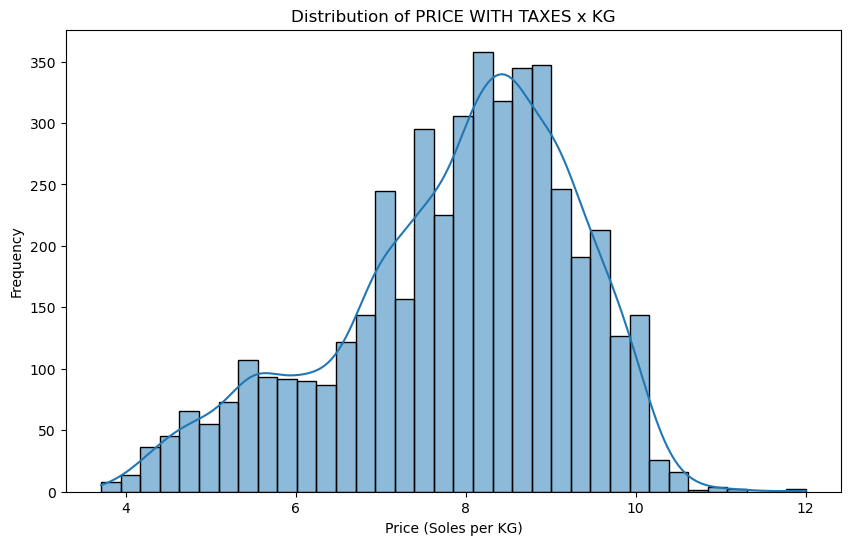

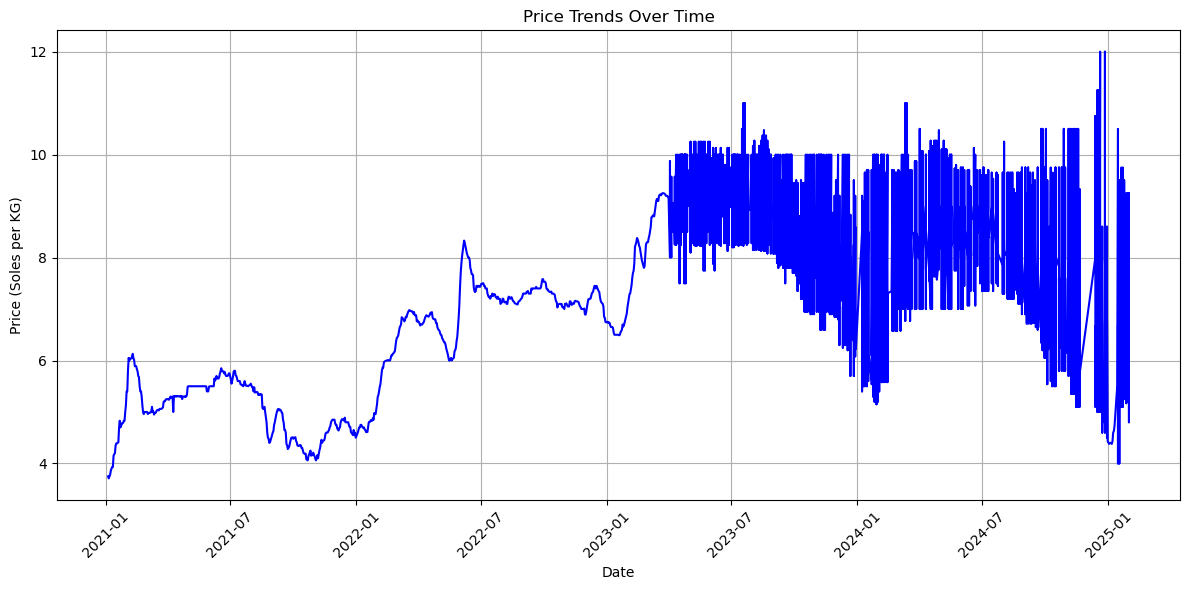

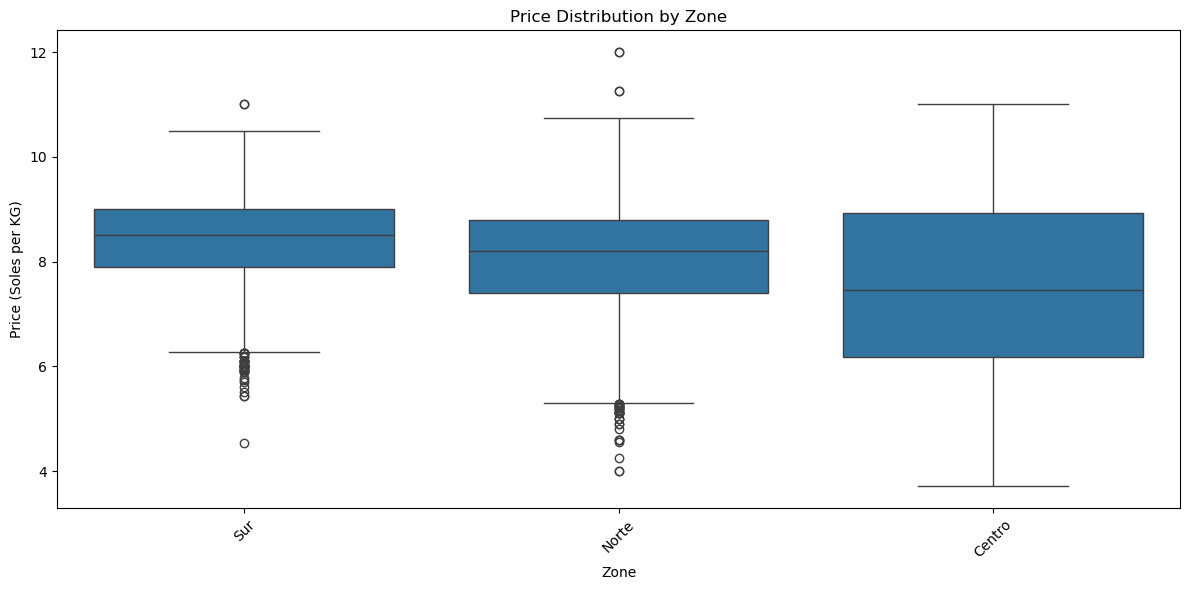

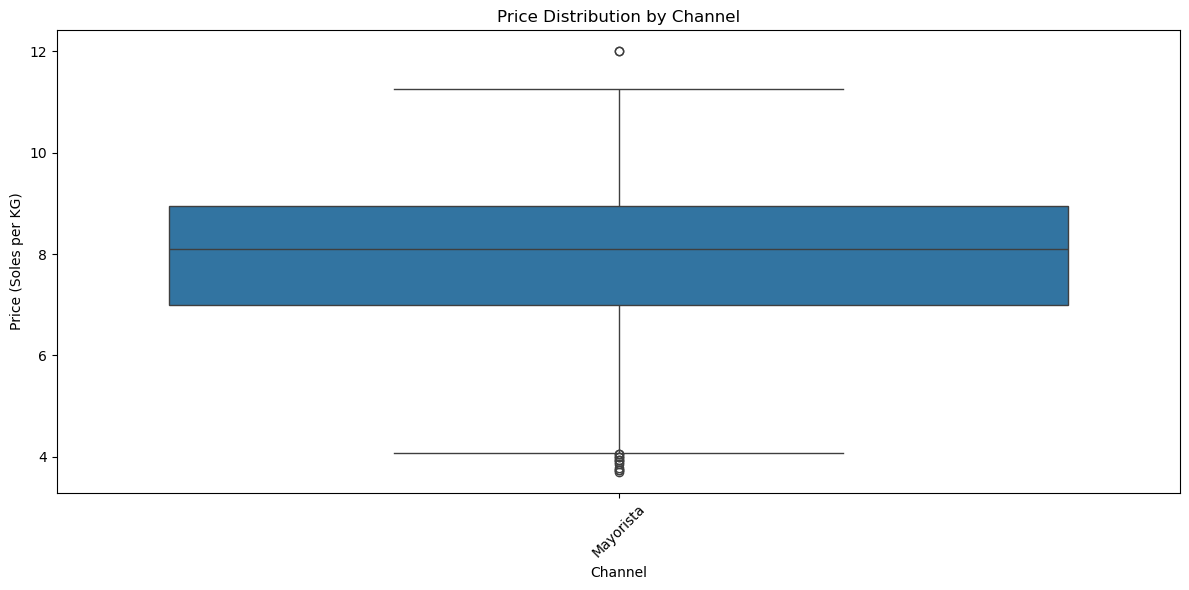

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'PRICE WITH TAXES x KG'
plt.figure(figsize=(10, 6))
sns.histplot(midagri_price['PRICE WITH TAXES x KG'], kde=True)
plt.title('Distribution of PRICE WITH TAXES x KG')
plt.xlabel('Price (Soles per KG)')
plt.ylabel('Frequency')
plt.show()

# Time Series Plot (Price Trends)
plt.figure(figsize=(12, 6))
plt.plot(midagri_price['DATE'], midagri_price['PRICE WITH TAXES x KG'], color='blue', linewidth=1.5)
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Soles per KG)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price Distribution by Zone
plt.figure(figsize=(12, 6))
sns.boxplot(x='ZONE', y='PRICE WITH TAXES x KG', data=midagri_price)
plt.title('Price Distribution by Zone')
plt.xlabel('Zone')
plt.ylabel('Price (Soles per KG)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price Distribution by Channel
plt.figure(figsize=(12, 6))
sns.boxplot(x='CHANNEL', y='PRICE WITH TAXES x KG', data=midagri_price)
plt.title('Price Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Price (Soles per KG)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Calera vs Midagri Comparison

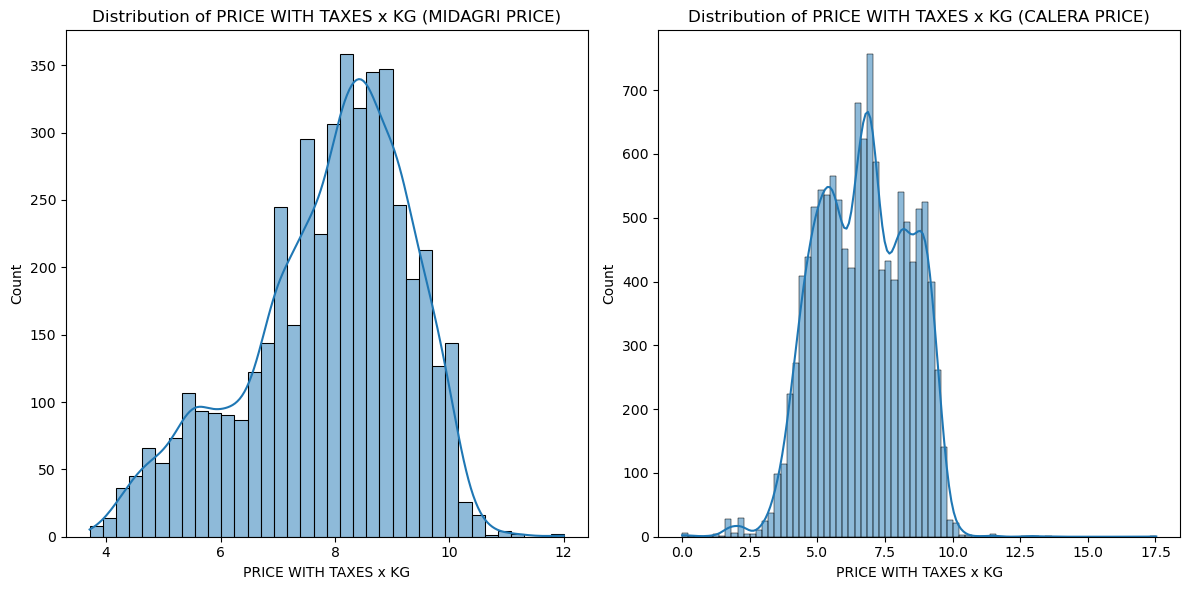

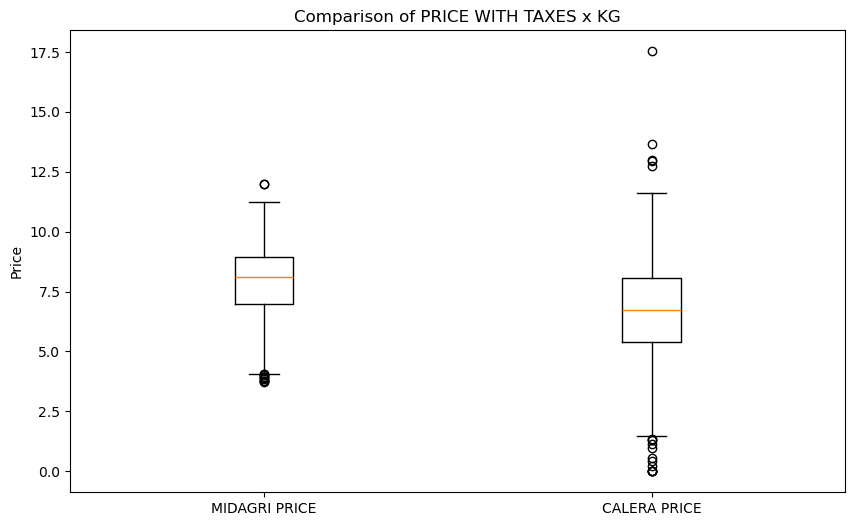

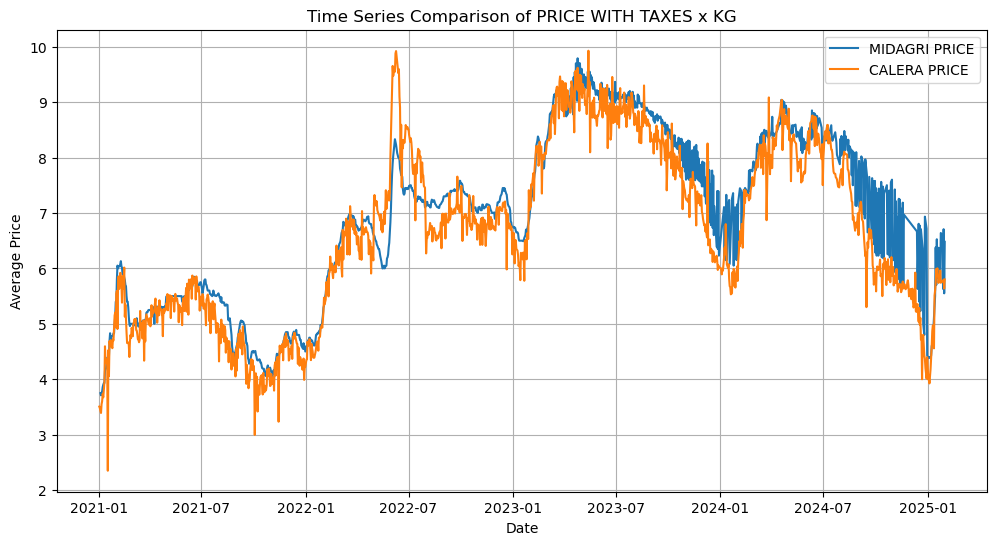

In [114]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(midagri_price['PRICE WITH TAXES x KG'], kde=True)
plt.title('Distribution of PRICE WITH TAXES x KG (MIDAGRI PRICE)')

plt.subplot(1, 2, 2)
sns.histplot(calera_wholesale['PRICE WITH TAXES x KG'], kde=True)
plt.title('Distribution of PRICE WITH TAXES x KG (CALERA PRICE)')

plt.tight_layout()
plt.show()

# Boxplot comparison
plt.figure(figsize=(10, 6))
plt.boxplot([midagri_price['PRICE WITH TAXES x KG'], calera_wholesale['PRICE WITH TAXES x KG']], labels=['MIDAGRI PRICE', 'CALERA PRICE'])
plt.title('Comparison of PRICE WITH TAXES x KG')
plt.ylabel('Price')
plt.show()

# Time series comparison

midagri_price_timeseries = midagri_price.groupby('DATE')['PRICE WITH TAXES x KG'].mean()
calera_wholesale_timeseries = calera_wholesale.groupby('Date')['PRICE WITH TAXES x KG'].mean()

if len(midagri_price_timeseries) > 0 and len(calera_wholesale_timeseries) > 0:
    plt.figure(figsize=(12, 6))
    plt.plot(midagri_price_timeseries.index, midagri_price_timeseries.values, label='MIDAGRI PRICE')
    plt.plot(calera_wholesale_timeseries.index, calera_wholesale_timeseries.values, label='CALERA PRICE')
    plt.title('Time Series Comparison of PRICE WITH TAXES x KG')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Time series comparison skipped. Insufficient data.")


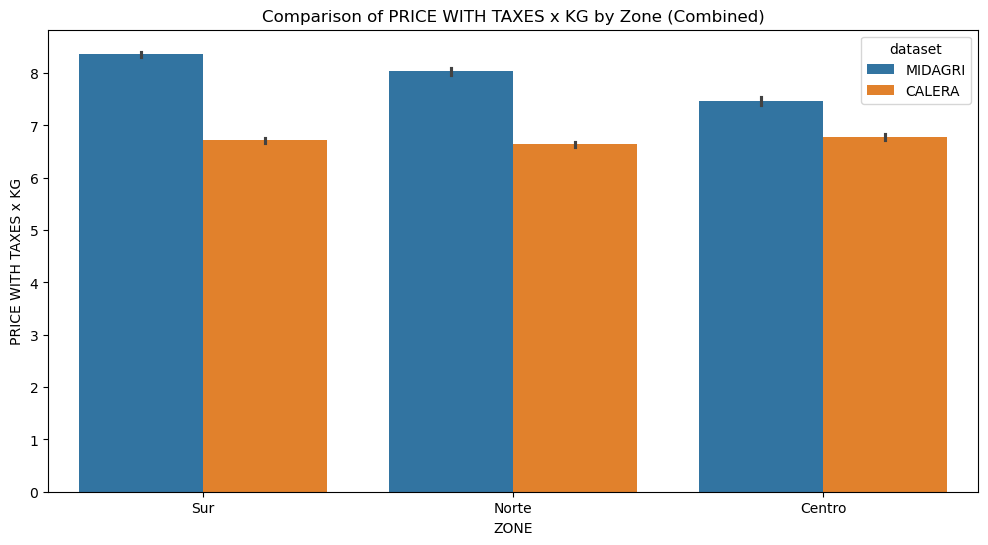

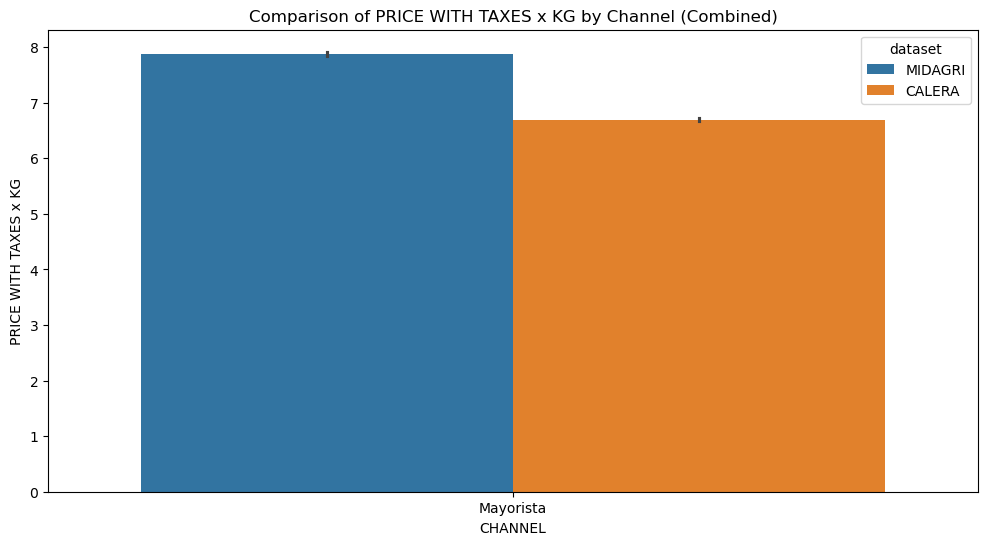

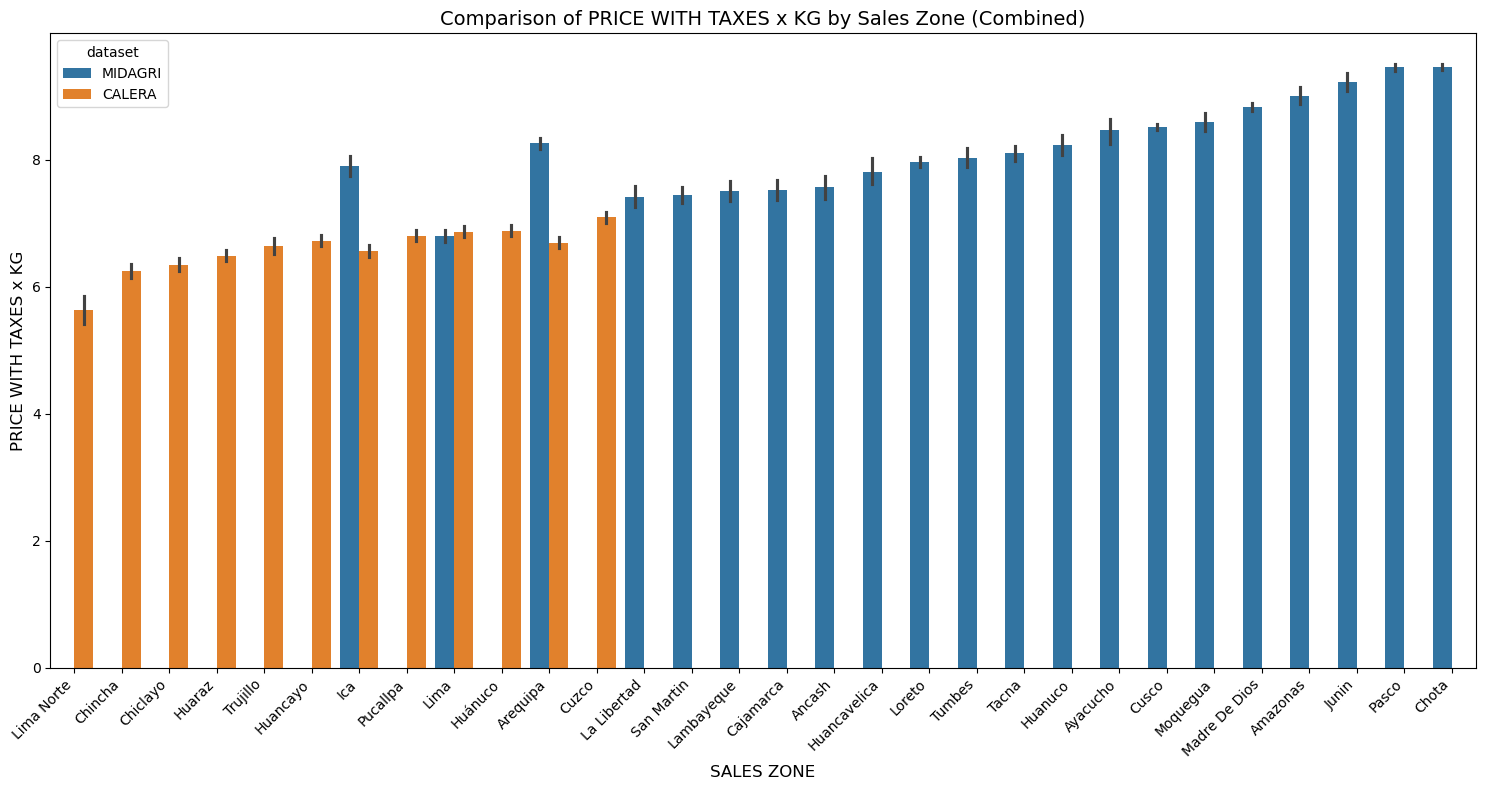

In [116]:
if 'ZONE' in midagri_price and 'ZONE' in calera_wholesale:
    combined_zone = pd.concat([
        midagri_price[['ZONE', 'PRICE WITH TAXES x KG']].assign(dataset='MIDAGRI'),
        calera_wholesale[['ZONE', 'PRICE WITH TAXES x KG']].assign(dataset='CALERA')
    ])

    plt.figure(figsize=(12, 6))
    sns.barplot(x='ZONE', y='PRICE WITH TAXES x KG', hue='dataset', data=combined_zone)
    plt.title('Comparison of PRICE WITH TAXES x KG by Zone (Combined)')
    plt.show()

# Combined Channel comparison.

if 'CHANNEL' in midagri_price and 'CHANNEL' in calera_wholesale:
    combined_channel = pd.concat([
        midagri_price[['CHANNEL', 'PRICE WITH TAXES x KG']].assign(dataset='MIDAGRI'),
        calera_wholesale[['CHANNEL', 'PRICE WITH TAXES x KG']].assign(dataset='CALERA')
    ])

    plt.figure(figsize=(12, 6))
    sns.barplot(x='CHANNEL', y='PRICE WITH TAXES x KG', hue='dataset', data=combined_channel)
    plt.title('Comparison of PRICE WITH TAXES x KG by Channel (Combined)')
    plt.show()

# Combined Sales Zone comparison.

if 'SALES ZONE' in midagri_price and 'SALES ZONE' in calera_wholesale:
    combined_sales_zone = pd.concat([
        midagri_price[['SALES ZONE', 'PRICE WITH TAXES x KG']].assign(dataset='MIDAGRI'),
        calera_wholesale[['SALES ZONE', 'PRICE WITH TAXES x KG']].assign(dataset='CALERA')
    ])

    combined_sales_zone['SALES ZONE'] = pd.Categorical(combined_sales_zone['SALES ZONE'],
                                                       categories=combined_sales_zone.groupby('SALES ZONE', observed=False)['PRICE WITH TAXES x KG'].mean().sort_values().index,
                                                       ordered=True)

    plt.figure(figsize=(15, 8))  
    sns.barplot(x='SALES ZONE', y='PRICE WITH TAXES x KG', hue='dataset', data=combined_sales_zone)

    plt.title('Comparison of PRICE WITH TAXES x KG by Sales Zone (Combined)', fontsize=14)  
    plt.xticks(rotation=45, ha='right', fontsize=10)  

    plt.xlabel('SALES ZONE', fontsize=12)  
    plt.ylabel('PRICE WITH TAXES x KG', fontsize=12)  
    plt.tight_layout()
    plt.show()
else:
    print("SALES ZONE column not found in one or both DataFrames.")

Academic Period vs Midagri Price 

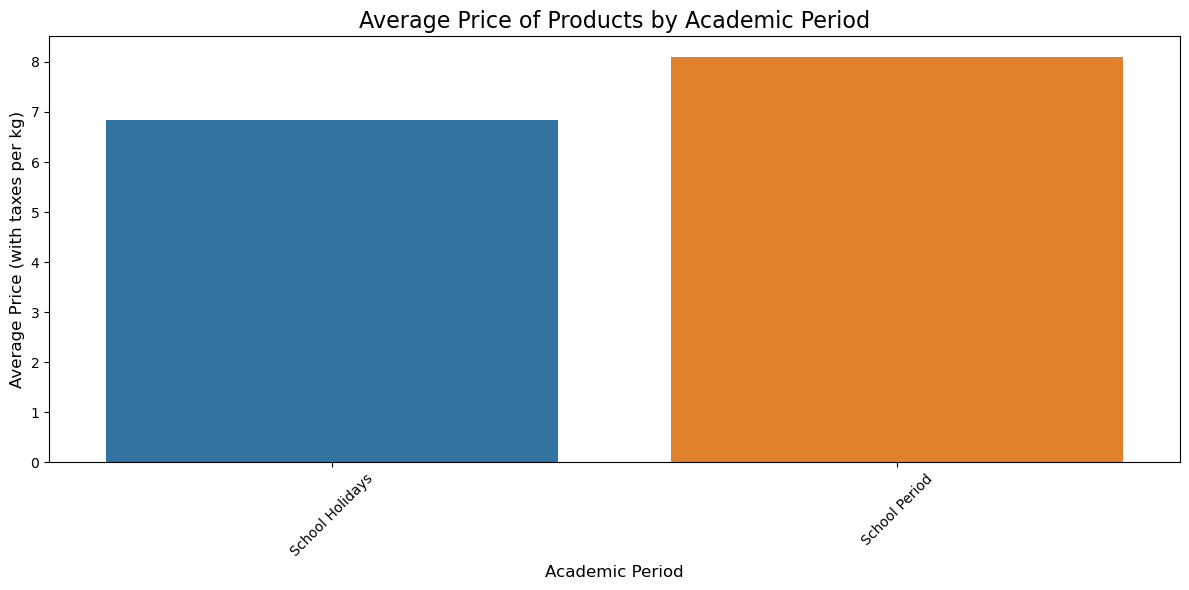

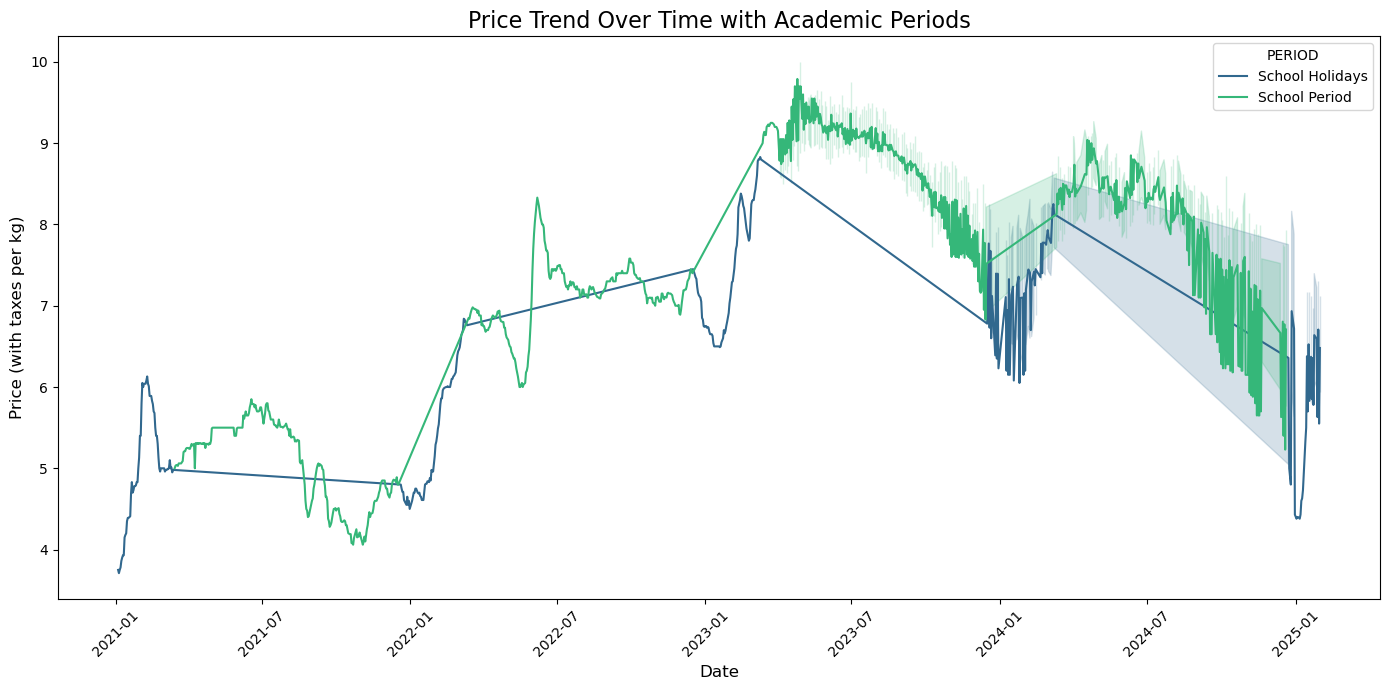

In [118]:
midagri_price['DATE'] = pd.to_datetime(midagri_price['DATE'])
academic_period['DATE'] = pd.to_datetime(academic_period['DATE'])

# Merge the datasets based on the 'DATE' column
merged_data = pd.merge(midagri_price, academic_period, on='DATE', how='left')


# Group by 'PERIOD' and calculate the average price
price_by_period = merged_data.groupby('PERIOD')['PRICE WITH TAXES x KG'].mean().reset_index()

# Plotting the average price by academic period
plt.figure(figsize=(12, 6))
sns.barplot(x='PERIOD', y='PRICE WITH TAXES x KG', data=price_by_period, hue='PERIOD')
plt.title("Average Price of Products by Academic Period", fontsize=16)
plt.xlabel("Academic Period", fontsize=12)
plt.ylabel("Average Price (with taxes per kg)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the price trend over time with academic periods highlighted
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_data, x='DATE', y='PRICE WITH TAXES x KG', hue='PERIOD', palette='viridis')
plt.title("Price Trend Over Time with Academic Periods", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (with taxes per kg)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

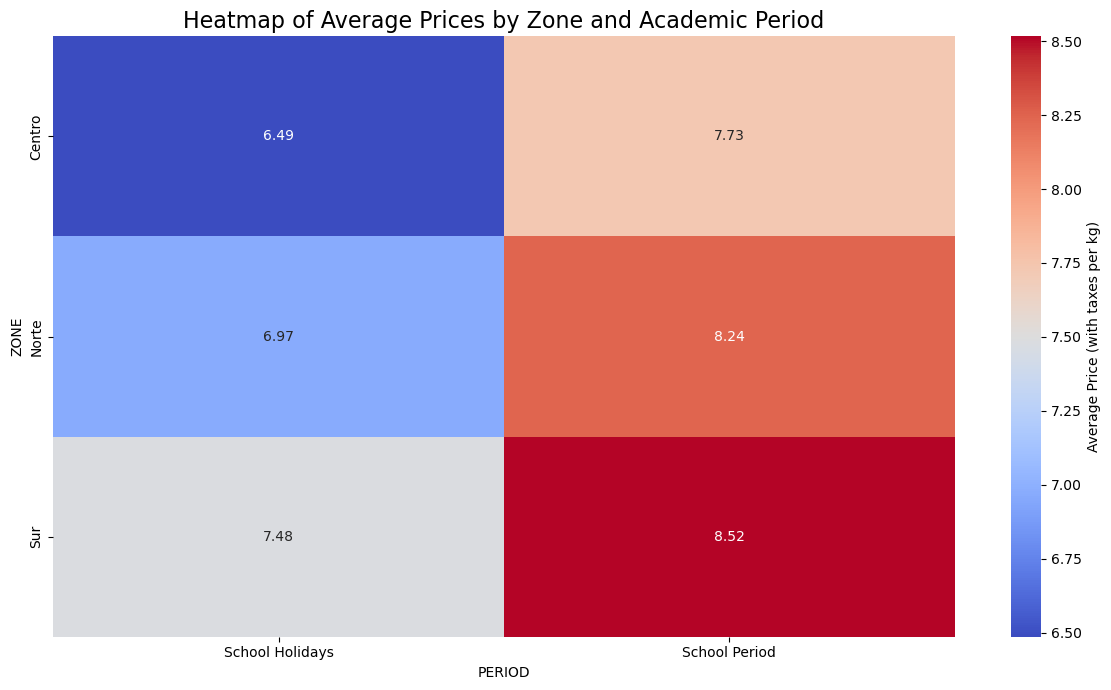

In [123]:
# Pivot table to see price changes across zones and academic periods
price_pivot = merged_data.pivot_table(
    index='ZONE', 
    columns='PERIOD', 
    values='PRICE WITH TAXES x KG', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 7))
sns.heatmap(price_pivot, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average Price (with taxes per kg)'})
plt.title("Heatmap of Average Prices by Zone and Academic Period", fontsize=16)
plt.tight_layout()
plt.show()


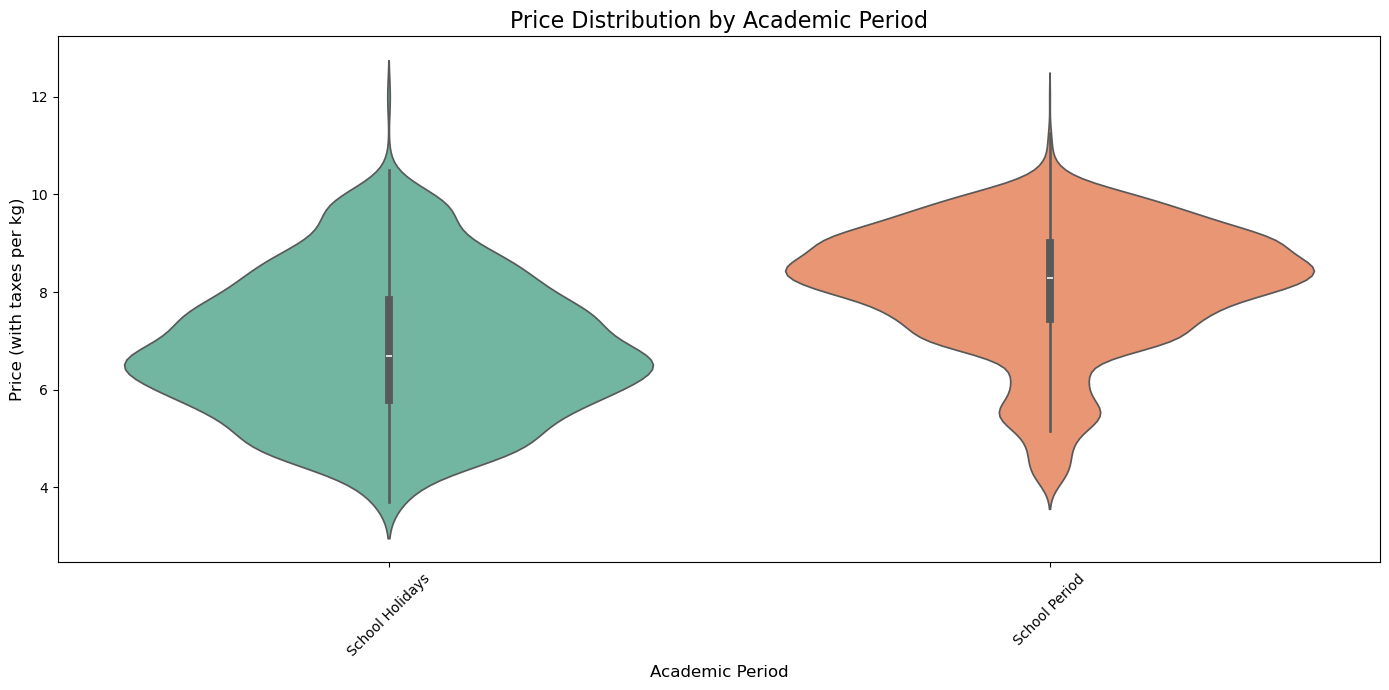

In [127]:
# Violin plot to show the price distribution across academic periods
plt.figure(figsize=(14, 7))
sns.violinplot(x='PERIOD', y='PRICE WITH TAXES x KG', data=merged_data, hue='PERIOD', palette='Set2', legend=False)
plt.title("Price Distribution by Academic Period", fontsize=16)
plt.xlabel("Academic Period", fontsize=12)
plt.ylabel("Price (with taxes per kg)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



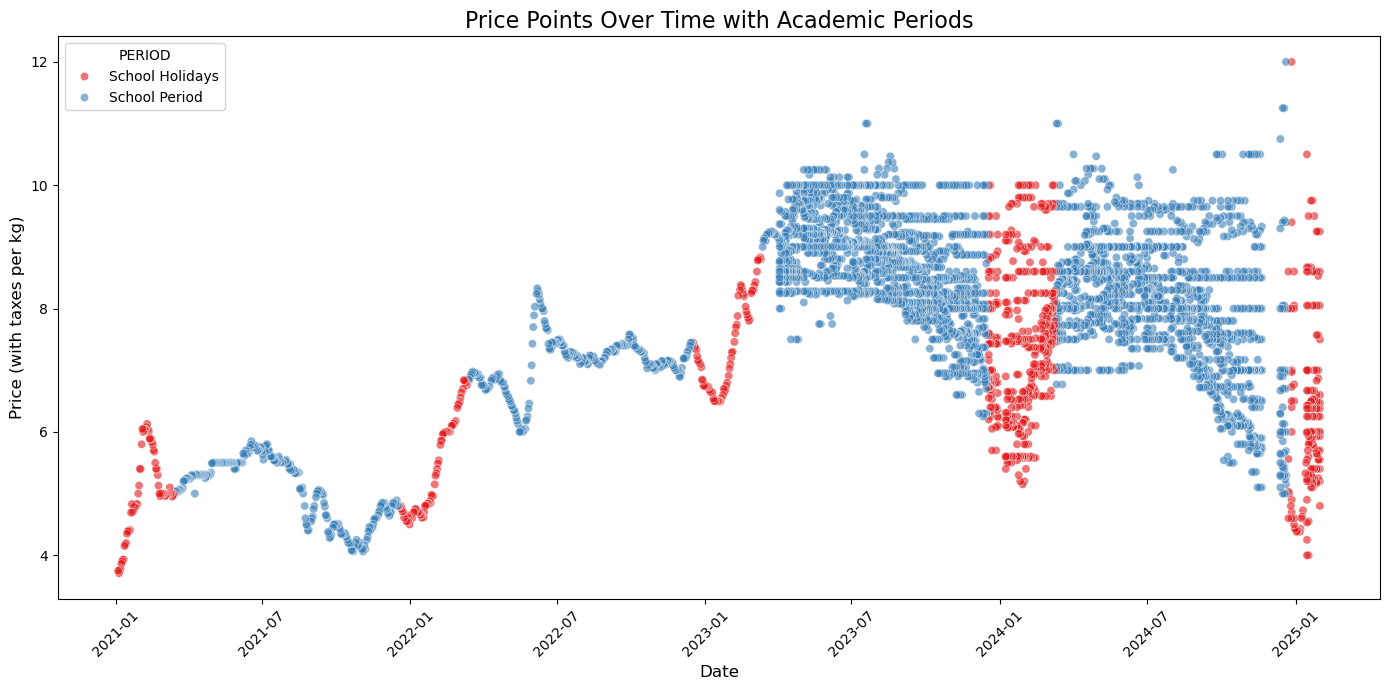

In [129]:
# Scatter plot to show individual price points over time
plt.figure(figsize=(14, 7))
sns.scatterplot(data=merged_data, x='DATE', y='PRICE WITH TAXES x KG', hue='PERIOD', palette='Set1', alpha=0.6)
plt.title("Price Points Over Time with Academic Periods", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (with taxes per kg)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


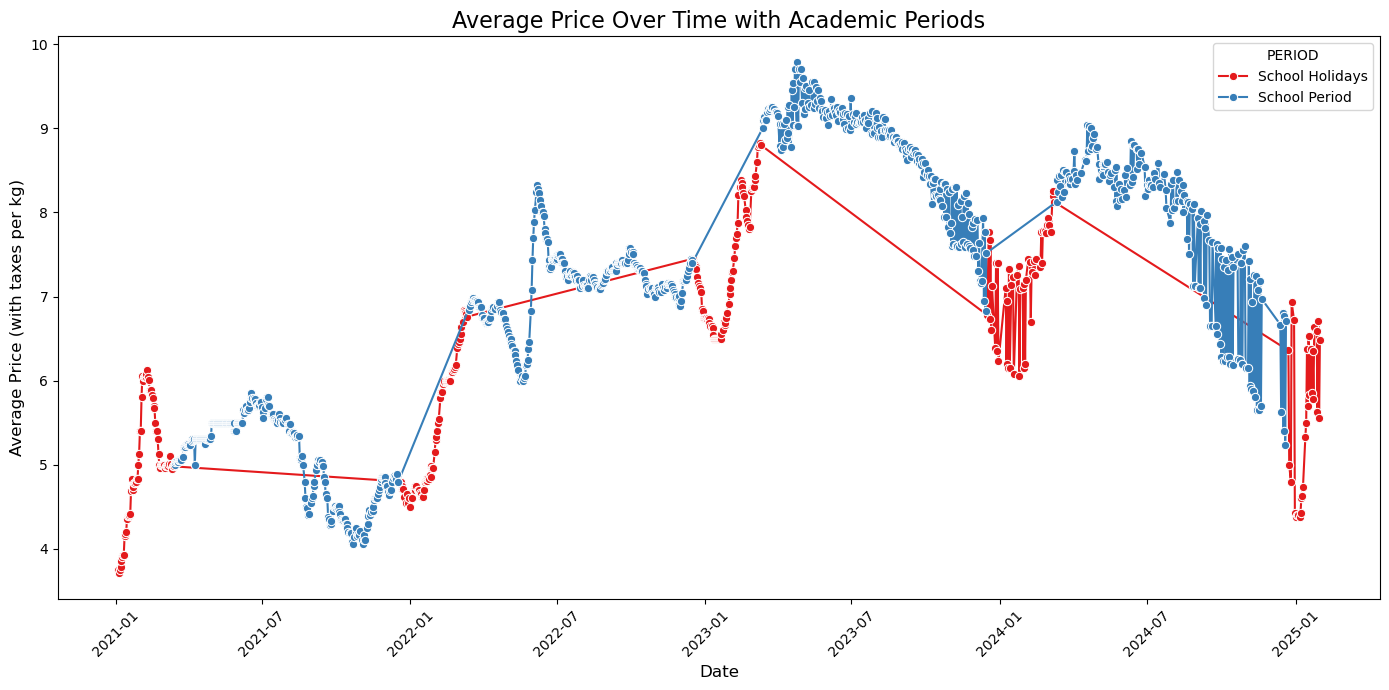

In [131]:
# Group by Date and Period to calculate average price
average_data = merged_data.groupby(['DATE', 'PERIOD'])['PRICE WITH TAXES x KG'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=average_data, x='DATE', y='PRICE WITH TAXES x KG', hue='PERIOD', palette='Set1', marker='o')
plt.title("Average Price Over Time with Academic Periods", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price (with taxes per kg)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


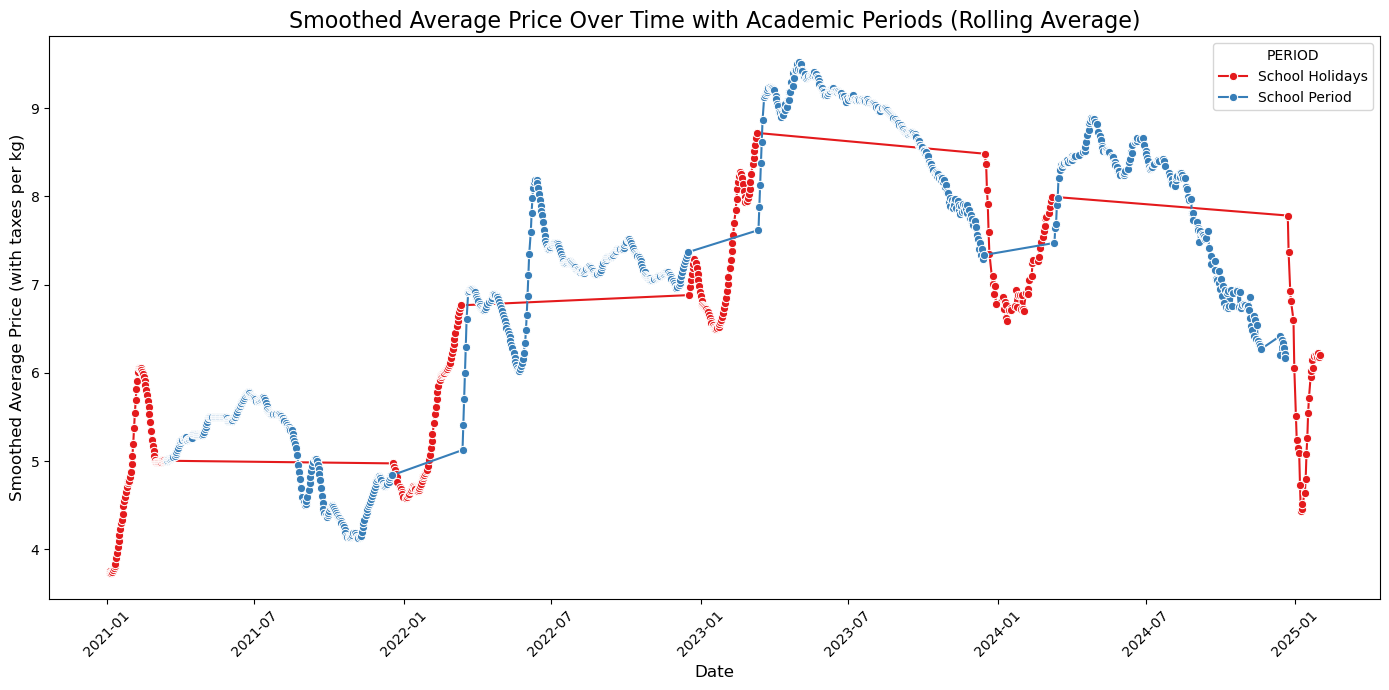

In [135]:
# Group by Date and Period to calculate average price
average_data = merged_data.groupby(['DATE', 'PERIOD'])['PRICE WITH TAXES x KG'].mean().reset_index()

# Calculate the rolling average with a window size of 7 days
average_data['Rolling_Avg'] = average_data.groupby('PERIOD')['PRICE WITH TAXES x KG'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)

# Line plot to show smoothed average price over time by academic period
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_data, x='DATE', y='Rolling_Avg', hue='PERIOD', palette='Set1', marker='o')
plt.title("Smoothed Average Price Over Time with Academic Periods (Rolling Average)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Smoothed Average Price (with taxes per kg)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualisation of Calera Hen prices vs Calera wholesale

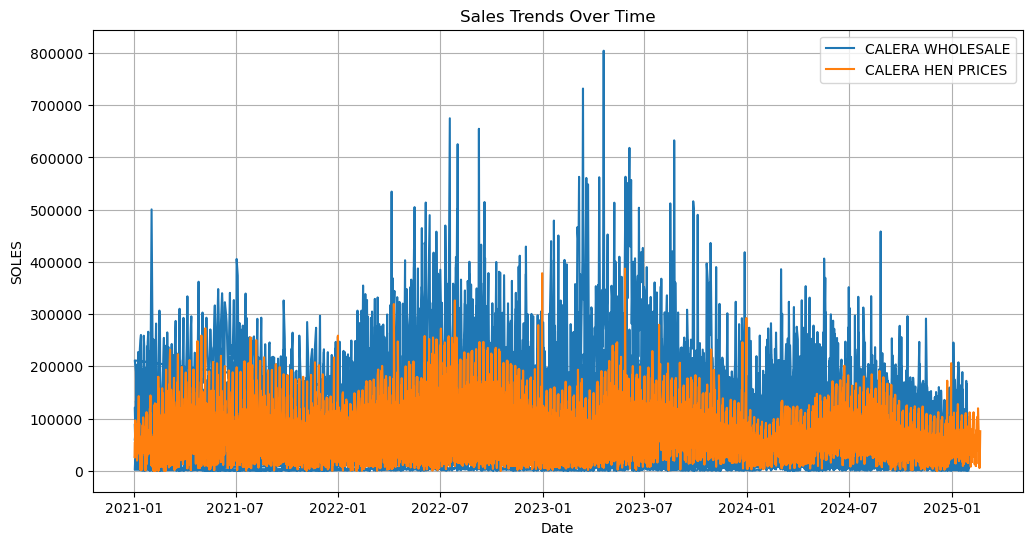

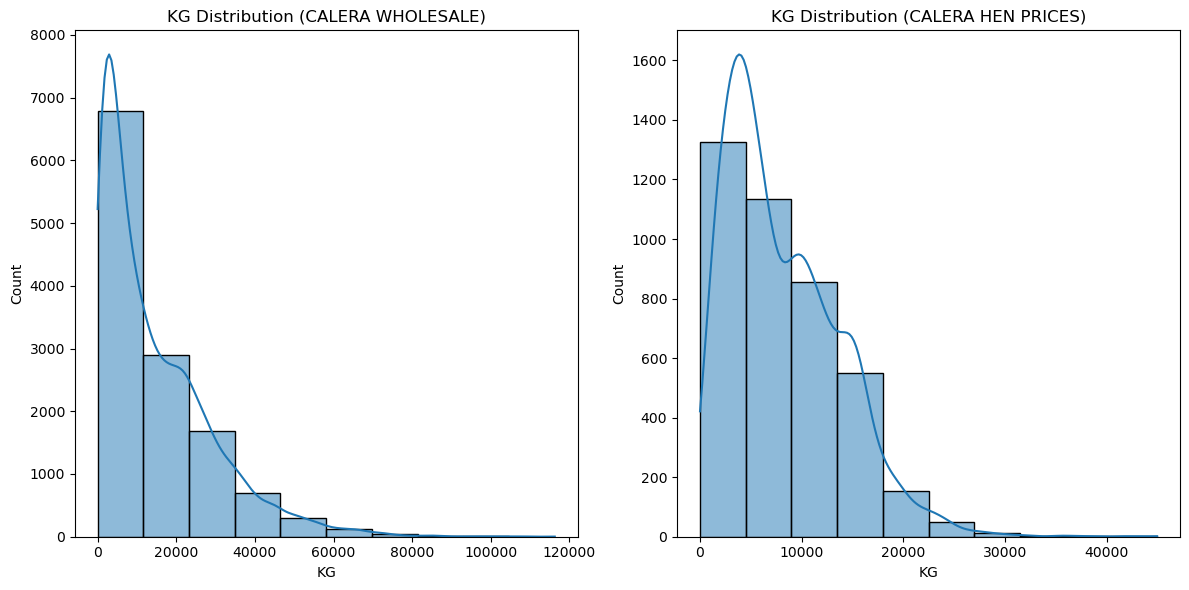

In [140]:
# Rename the 'SOLES (CURRENCY)' column in dataset 2 to 'SOLES' for consistency
calera_hen_prices.rename(columns={'SOLES (CURRENCY)': 'SOLES'}, inplace=True)

# Sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(calera_wholesale['Date'], calera_wholesale['SOLES'], label='CALERA WHOLESALE')
plt.plot(calera_hen_prices['Date'], calera_hen_prices['SOLES'], label='CALERA HEN PRICES')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('SOLES')
plt.legend()
plt.grid(True)
plt.show()

# KG Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(calera_wholesale['KG'], bins=10, kde=True)
plt.title('KG Distribution (CALERA WHOLESALE)')
plt.subplot(1,2,2)
sns.histplot(calera_hen_prices['KG'], bins=10, kde=True)
plt.title('KG Distribution (CALERA HEN PRICES)')
plt.tight_layout()
plt.show()

In [142]:
# Create new DataFrames containing only the `Date` and `PRICE WITH NO TAXES x KG` columns for both datasets
calera_wholesale_price = calera_wholesale[['Date', 'PRICE WITH NO TAXES x KG']].copy()
calera_hen_prices_price = calera_hen_prices[['Date', 'PRICE WITH NO TAXES x KG']].copy()

# Aggregate both datasets by `Date`, calculating the mean `PRICE WITH NO TAXES x KG` for each day
calera_wholesale_price_agg = calera_wholesale_price.groupby('Date')['PRICE WITH NO TAXES x KG'].mean().reset_index()
calera_hen_prices_price_agg = calera_hen_prices_price.groupby('Date')['PRICE WITH NO TAXES x KG'].mean().reset_index()

# Merge the aggregated DataFrames
merged_price_data = pd.merge(calera_wholesale_price_agg, calera_hen_prices_price_agg, on='Date', how='outer', suffixes=('_egg', '_hen'))

# Melt the DataFrame to long format for plotting
melted_price_data = merged_price_data.melt('Date', var_name='Dataset', value_name='Average Price')

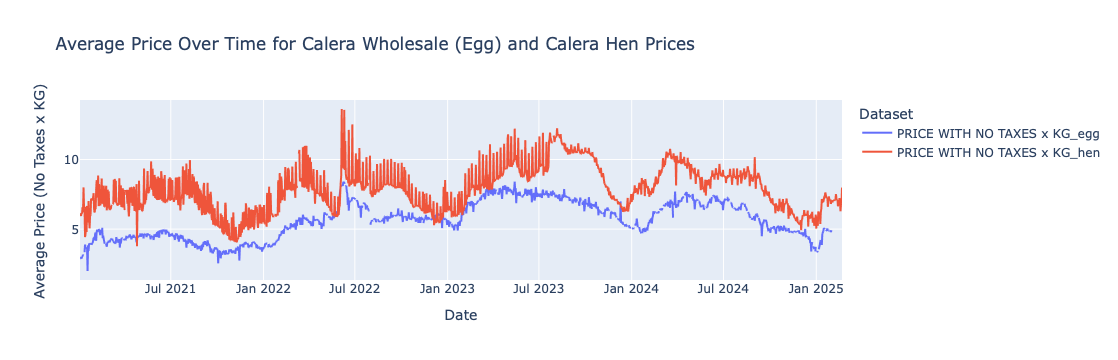

In [144]:
import plotly.express as px

fig = px.line(melted_price_data, x='Date', y='Average Price', color='Dataset',
              title='Average Price Over Time for Calera Wholesale (Egg) and Calera Hen Prices',
              labels={'Average Price': 'Average Price (No Taxes x KG)', 'Date': 'Date'})

# Show the plot
fig.show()

Farm prices vs midagri prices

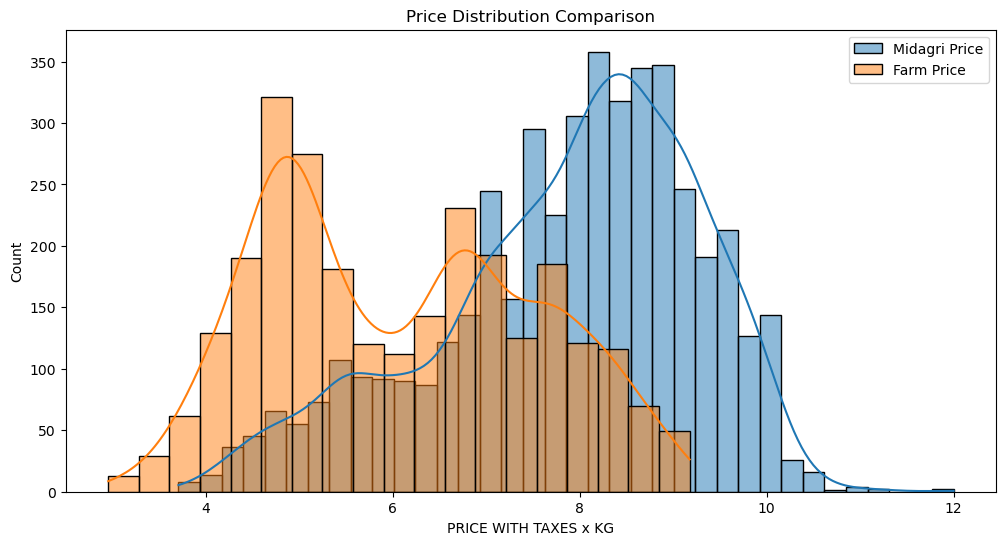

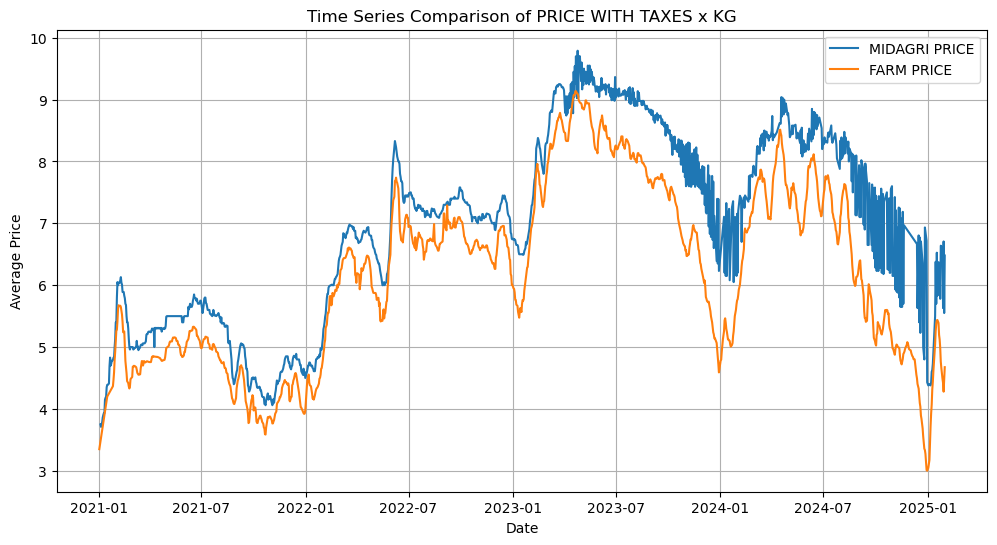

In [150]:
# Analyze unique zones
unique_zones_midagri_price = set(midagri_price['ZONE'].unique())
unique_zones_farm_prices = set(farm_prices['ZONE'].unique())

# Find common and unique zones
common_zones = unique_zones_midagri_price.intersection(unique_zones_farm_prices)
zones_only_in_midagri_price = unique_zones_midagri_price.difference(unique_zones_farm_prices)
zones_only_in_farm_prices = unique_zones_farm_prices.difference(unique_zones_midagri_price)

price_stats_midagri_price = midagri_price['PRICE WITH TAXES x KG'].describe()
price_stats_farm_prices = farm_prices['FRAM PRICE x KG'].describe()

# Histogram of prices for both datasets
plt.figure(figsize=(12, 6))
sns.histplot(midagri_price['PRICE WITH TAXES x KG'], kde=True, label='Midagri Price')
sns.histplot(farm_prices['FRAM PRICE x KG'], kde=True, label='Farm Price')
plt.title('Price Distribution Comparison')
plt.legend()
plt.show()

if 'DATE' in midagri_price.columns:
    midagri_price['Month_Year'] = pd.to_datetime(midagri_price['DATE']).dt.to_period('M')
else:
    print("The 'DATE' column is missing in the midagri_price DataFrame.")


midagri_price_timeseries = midagri_price.groupby('DATE')['PRICE WITH TAXES x KG'].mean()
farm_prices_timeseries = farm_prices.groupby('DATE')['FRAM PRICE x KG'].mean()

if len(midagri_price_timeseries) > 0 and len(farm_prices_timeseries) > 0:
    plt.figure(figsize=(12, 6))
    plt.plot(midagri_price_timeseries.index, midagri_price_timeseries.values, label='MIDAGRI PRICE')
    plt.plot(farm_prices_timeseries.index, farm_prices_timeseries.values, label='FARM PRICE')
    plt.title('Time Series Comparison of PRICE WITH TAXES x KG')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Time series comparison skipped. Insufficient data.")

IMP - Calera vs Midagri vs Farm 

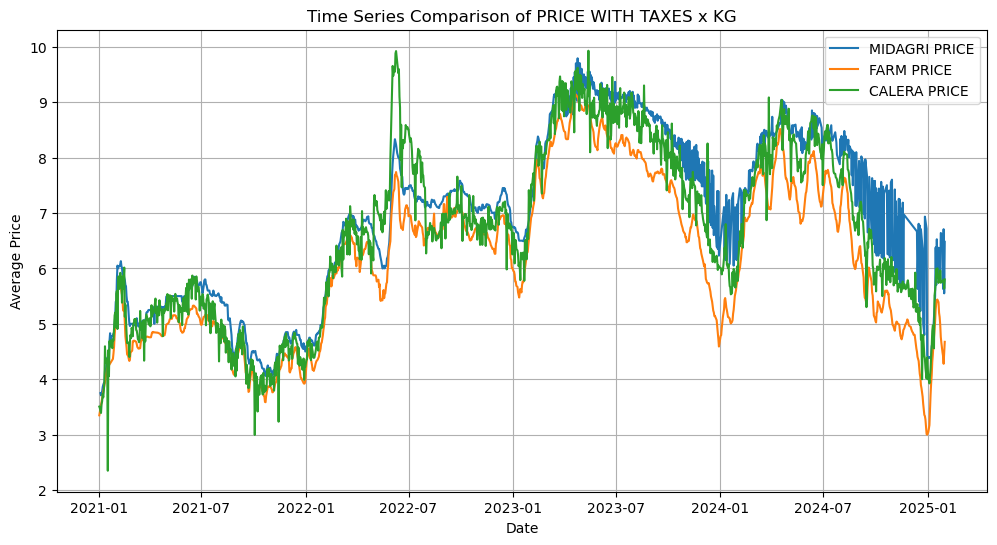

In [153]:

calera_wholesale_timeseries = calera_wholesale.groupby('Date')['PRICE WITH TAXES x KG'].mean()
midagri_price_timeseries = midagri_price.groupby('DATE')['PRICE WITH TAXES x KG'].mean()
farm_prices_timeseries = farm_prices.groupby('DATE')['FRAM PRICE x KG'].mean()

if len(midagri_price_timeseries) > 0 and len(farm_prices_timeseries) > 0:
    plt.figure(figsize=(12, 6))
    plt.plot(midagri_price_timeseries.index, midagri_price_timeseries.values, label='MIDAGRI PRICE')
    plt.plot(farm_prices_timeseries.index, farm_prices_timeseries.values, label='FARM PRICE')
    plt.plot(calera_wholesale_timeseries.index, calera_wholesale_timeseries.values, label='CALERA PRICE')
    plt.title('Time Series Comparison of PRICE WITH TAXES x KG')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Time series comparison skipped. Insufficient data.")

Holidays vs Midagri price

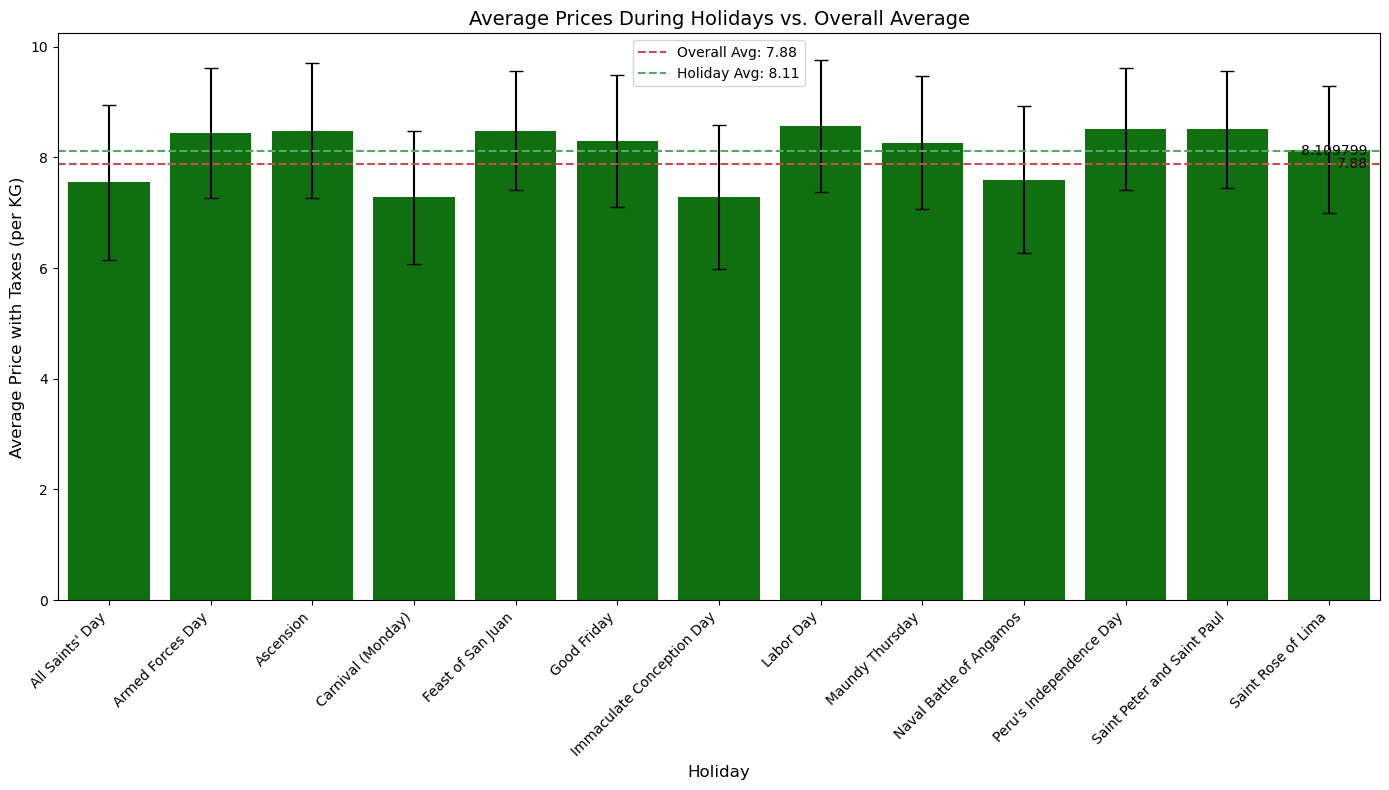

Overall Average Price: 7.88
Average Price During Holidays: 8.109799
Prices tend to be higher during holidays.


In [166]:

# Overall Average Price
overall_avg_price = midagri_price['PRICE WITH TAXES x KG'].mean()

# Holiday Windows (7 days before and after)
window = pd.Timedelta(days=7)

midagri_price['month_day'] = midagri_price['DATE'].dt.strftime('%m-%d')
holidays_and_events['month_day'] = holidays_and_events['Date'].dt.strftime('%m-%d')

# Merge and Filter Data
holiday_prices = []
for _, holiday in holidays_and_events.iterrows():
    holiday_date = pd.to_datetime(holiday['Date'])
    window_start = holiday_date - window
    window_end = holiday_date + window

    window_start_md = window_start.strftime('%m-%d')
    window_end_md = window_end.strftime('%m-%d')

    # Filter data within the holiday window
    window_data = midagri_price[
        (midagri_price['month_day'] >= window_start_md) & (midagri_price['month_day'] <= window_end_md)
    ]
    if not window_data.empty: 
        holiday_prices.append({
            'Holiday': holiday['Event'],
            'Average Price': window_data['PRICE WITH TAXES x KG'].mean(),
            'Std Dev': window_data['PRICE WITH TAXES x KG'].std()
        })

holiday_prices_df = pd.DataFrame(holiday_prices)

# Aggregate the standard deviations by holiday name
holiday_std_devs = holiday_prices_df.groupby('Holiday')['Std Dev'].mean().reset_index()
holiday_prices_df = holiday_prices_df.groupby('Holiday')['Average Price'].mean().reset_index()
holiday_prices_df = pd.merge(holiday_prices_df, holiday_std_devs, on='Holiday')

plt.figure(figsize=(14, 8))  
sns.barplot(x='Holiday', y='Average Price', data=holiday_prices_df,
            yerr=holiday_prices_df['Std Dev'], 
            color='green',  
            error_kw={'capsize': 5})  
plt.axhline(y=overall_avg_price, color='#c44e52', linestyle='--', label=f'Overall Avg: {overall_avg_price:.2f}')
plt.axhline(y=holiday_prices_df['Average Price'].mean(), color='#55a868', linestyle='--', label=f'Holiday Avg: {holiday_prices_df['Average Price'].mean():.2f}')

plt.annotate(f'{overall_avg_price:.2f}', xy=(0.98, overall_avg_price), xycoords=('axes fraction', 'data'),
             xytext=(10, 0), textcoords='offset points', ha='right', va='center', fontsize=10)

plt.annotate(f'{holiday_prices_df['Average Price'].mean():2f}', xy=(0.98, holiday_prices_df['Average Price'].mean()), xycoords=('axes fraction', 'data'),
             xytext=(10, 0), textcoords='offset points', ha='right', va='center', fontsize=10)

plt.title('Average Prices During Holidays vs. Overall Average', fontsize=14)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Average Price with Taxes (per KG)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(f"Overall Average Price: {overall_avg_price:.2f}")
print(f"Average Price During Holidays: {holiday_prices_df['Average Price'].mean():2f}")

if holiday_prices_df['Average Price'].mean() > overall_avg_price:
    print("Prices tend to be higher during holidays.")
elif holiday_prices_df['Average Price'].mean() < overall_avg_price:
    print("Prices tend to be lower during holidays.")
else:
    print("Prices during holidays are similar to the overall average.")

Hens management

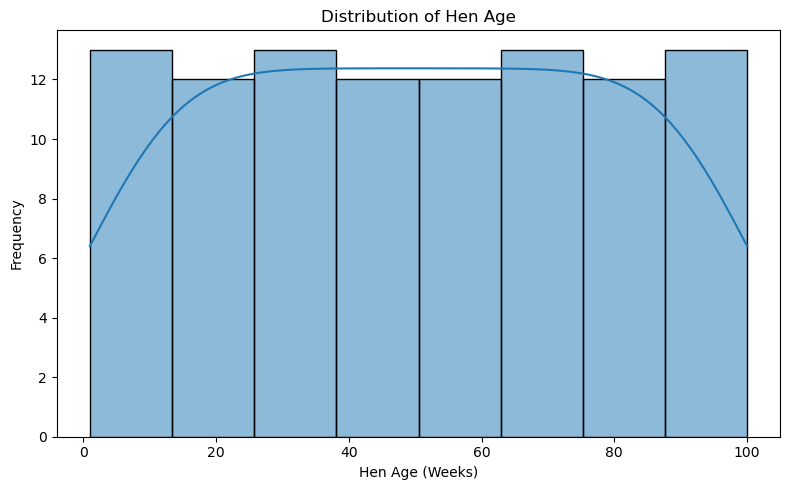

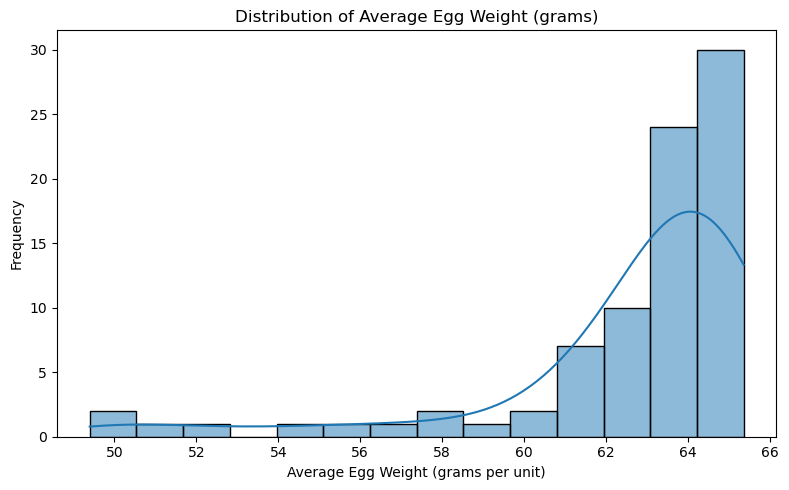

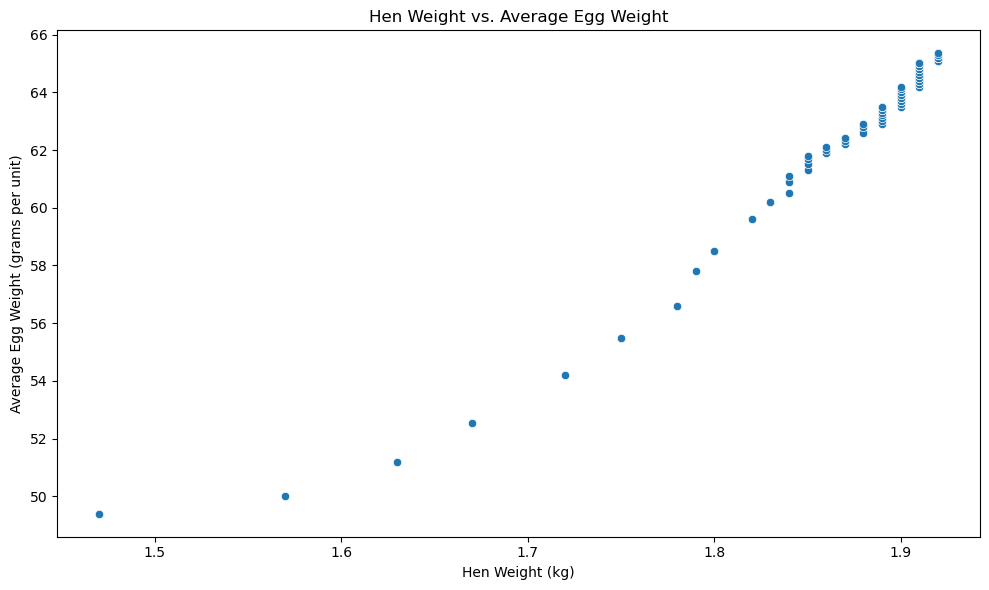

In [172]:

hens_management.columns = hens_management.columns.str.strip()

plt.figure(figsize=(8, 5))
sns.histplot(hens_management["Edad"], kde=True)
plt.title('Distribution of Hen Age')
plt.xlabel('Hen Age (Weeks)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(hens_management["0) Peso Huevo Prom (Gr/Un)"], kde=True)
plt.title('Distribution of Average Egg Weight (grams)')
plt.xlabel('Average Egg Weight (grams per unit)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=hens_management["Peso Gallina Min (kg)"], y=hens_management["0) Peso Huevo Prom (Gr/Un)"])
plt.title('Hen Weight vs. Average Egg Weight')
plt.xlabel('Hen Weight (kg)')
plt.ylabel('Average Egg Weight (grams per unit)')
plt.tight_layout()
plt.show()


Hens management vs midagri

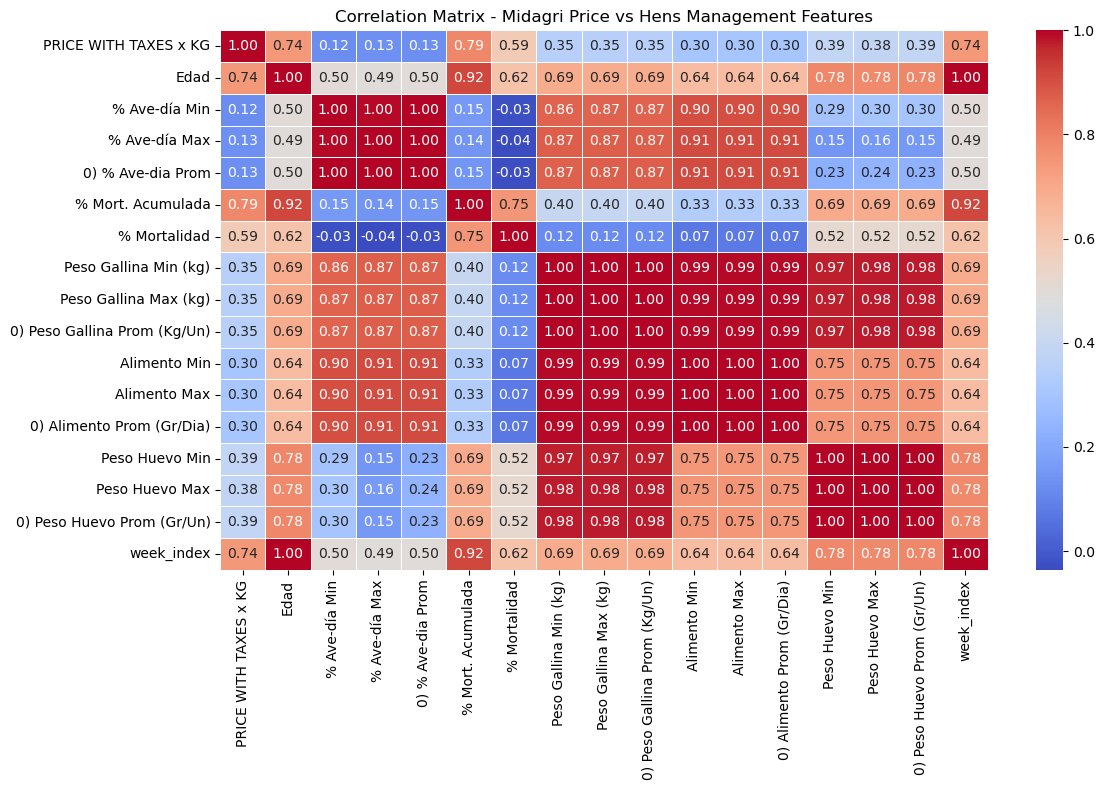

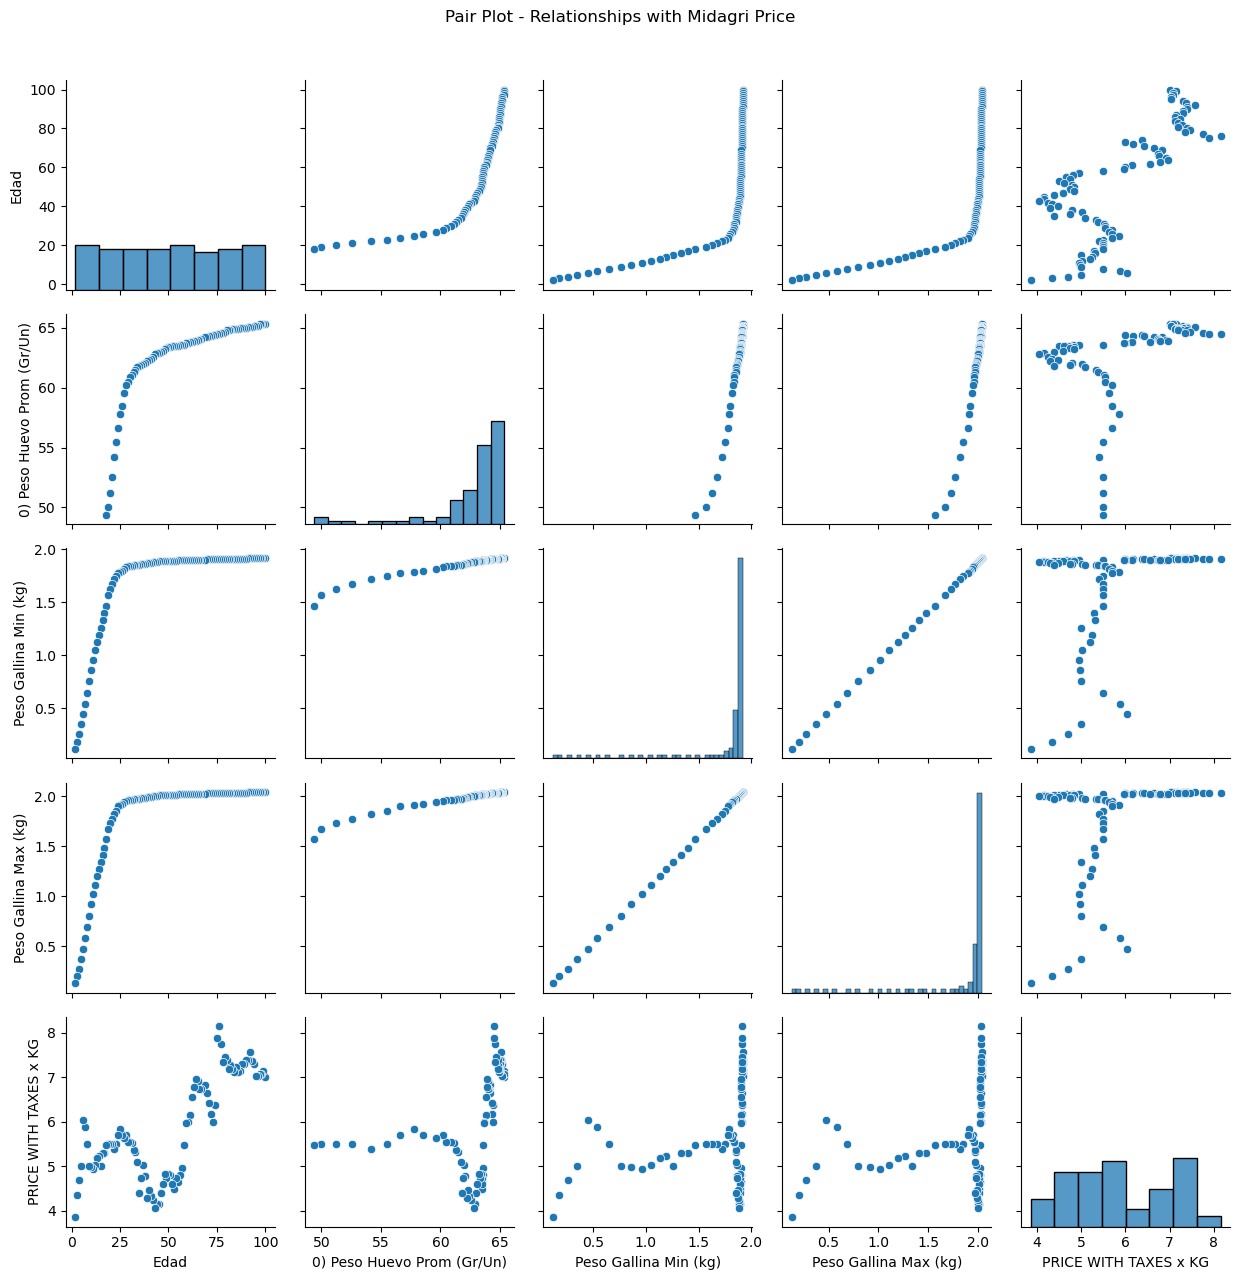

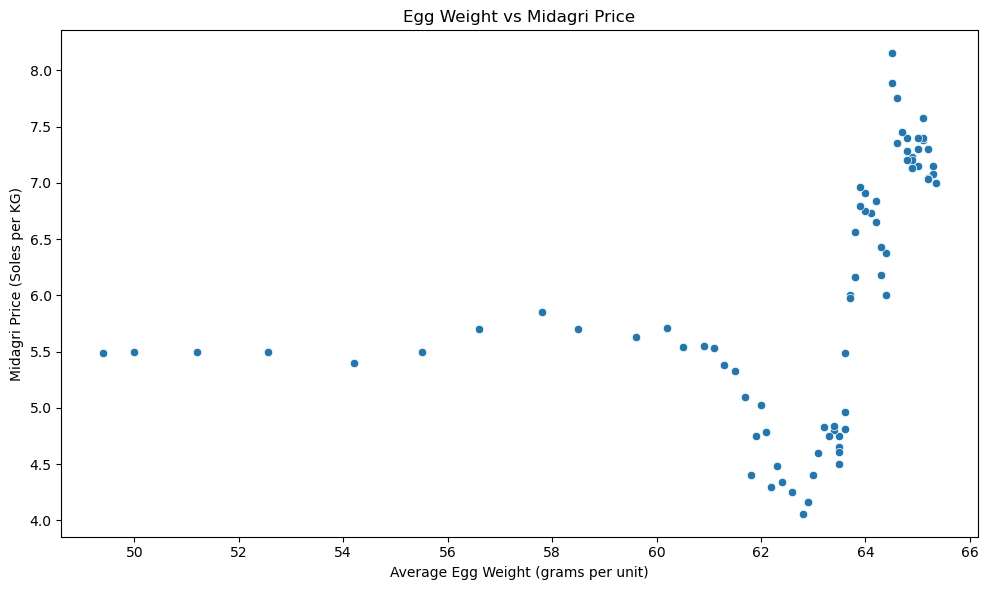

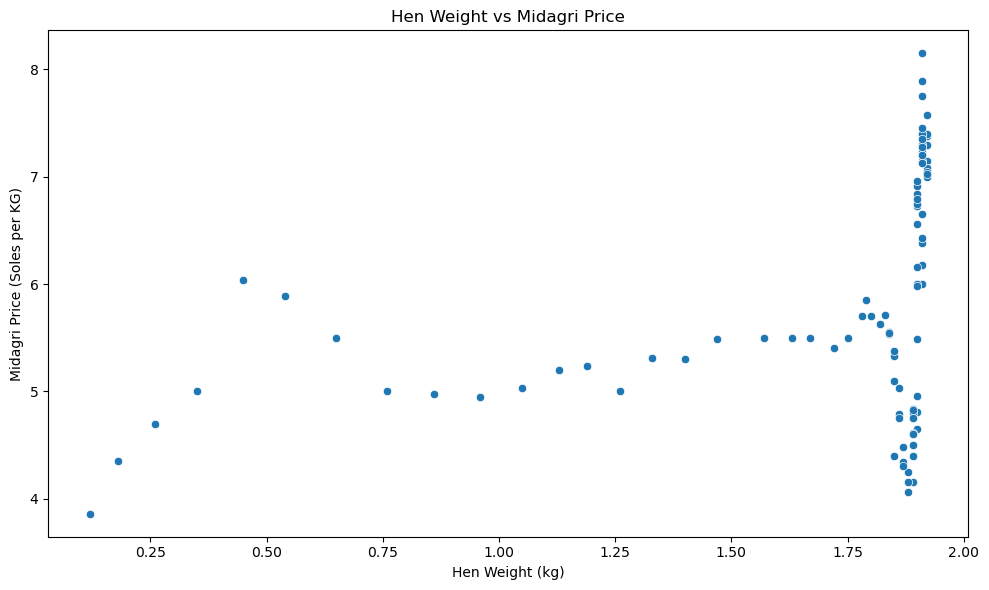

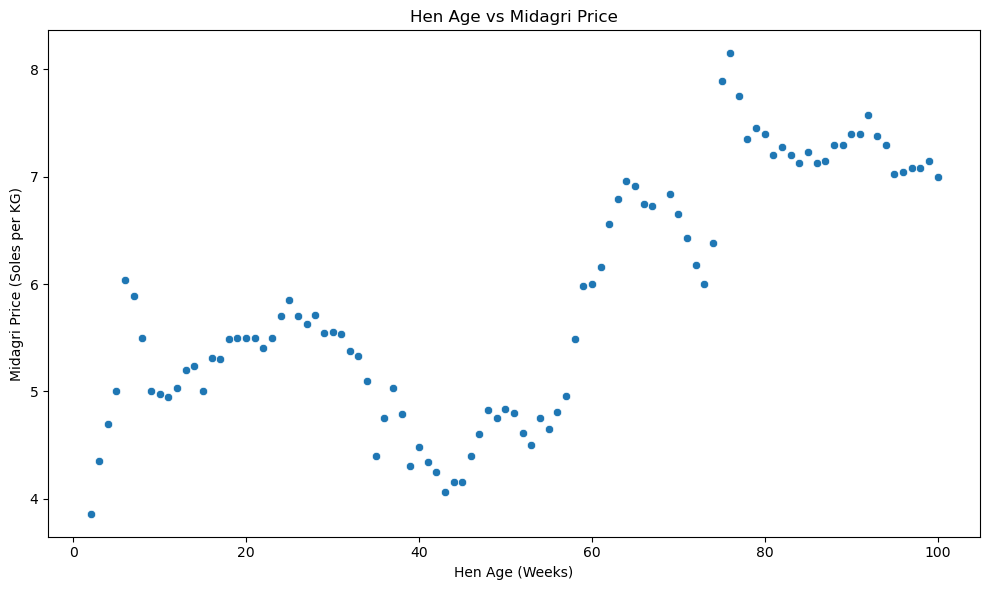

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the week_index to datetime format in hens_management
# Assuming week_index starts at 1 for the first week
hens_management['week_index'] = range(1, len(hens_management) + 1)

hens_management['week_start_date'] = pd.to_datetime('2021-01-01') + pd.to_timedelta((hens_management['week_index'] - 1) * 7, unit='D')

merged_data = pd.merge(midagri_price, hens_management, left_on='DATE', right_on='week_start_date', how='inner')

numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Midagri Price vs Hens Management Features')
plt.tight_layout()
plt.show()

sns.pairplot(merged_data[['Edad', '0) Peso Huevo Prom (Gr/Un)', 'Peso Gallina Min (kg)', 'Peso Gallina Max (kg)', 'PRICE WITH TAXES x KG']])
plt.suptitle('Pair Plot - Relationships with Midagri Price', y=1.02)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['0) Peso Huevo Prom (Gr/Un)'], y=merged_data['PRICE WITH TAXES x KG'])
plt.title('Egg Weight vs Midagri Price')
plt.xlabel('Average Egg Weight (grams per unit)')
plt.ylabel('Midagri Price (Soles per KG)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Peso Gallina Min (kg)'], y=merged_data['PRICE WITH TAXES x KG'])
plt.title('Hen Weight vs Midagri Price')
plt.xlabel('Hen Weight (kg)')
plt.ylabel('Midagri Price (Soles per KG)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Edad'], y=merged_data['PRICE WITH TAXES x KG'])
plt.title('Hen Age vs Midagri Price')
plt.xlabel('Hen Age (Weeks)')
plt.ylabel('Midagri Price (Soles per KG)')
plt.tight_layout()
plt.show()
